In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
df.shape


(73100, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
df.describe()



,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [ ]:
df.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [ ]:
# Fill missing numeric values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)



/tmp/ipython-input-419292514.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Fill missing categorical values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-218376586.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Creating Demand Level based on Sales
df['Demand_Level'] = pd.qcut(df['Units Sold'], q=2, labels=['0 ', '1 '])
le = LabelEncoder()


In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.corr()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Demand_Level
Date,1.000000e+00,4.484598e-15,-1.960169e-14,-0.003334,-0.002042,-0.001044,-0.002093,-0.000216,-0.002125,-0.009174,-0.002233,0.001079,-0.003454,-0.008891,0.002465,-0.002067
Store ID,4.484598e-15,1.000000e+00,-2.848787e-17,0.000034,0.003347,0.005774,0.005363,-0.001254,0.005666,0.001549,0.001311,-0.000078,0.001567,0.002763,-0.004104,0.005591
Product ID,-1.960169e-14,-2.848787e-17,1.000000e+00,-0.003368,0.007760,0.009334,0.007005,0.004651,0.006659,0.000931,-0.000165,-0.005710,-0.001620,0.001216,-0.000219,0.006088
Category,-3.333783e-03,3.419882e-05,-3.368402e-03,1.000000,0.000841,0.001439,0.000512,-0.001686,0.000495,0.001375,-0.001784,-0.000624,-0.000864,0.000947,-0.001474,0.002515
Region,-2.042305e-03,3.347384e-03,7.759923e-03,0.000841,1.000000,-0.006837,-0.003109,0.003172,-0.002467,-0.003576,-0.002696,0.000209,-0.001074,-0.003389,-0.000785,-0.004159
Inventory Level,-1.044182e-03,5.774321e-03,9.334022e-03,0.001439,-0.006837,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.001898,0.003411,0.009365,-0.003425,0.495485
Units Sold,-2.093278e-03,5.362568e-03,7.004638e-03,0.000512,-0.003109,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,0.004688,-0.000374,0.001259,-0.003324,0.793253
Units Ordered,-2.157194e-04,-1.254359e-03,4.650682e-03,-0.001686,0.003172,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,-0.001064,0.005446,0.004596,0.003492,0.000846
Demand Forecast,-2.124881e-03,5.665945e-03,6.659092e-03,0.000495,-0.002467,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,0.004768,-0.000526,0.000844,-0.003109,0.790926
Price,-9.173979e-03,1.549445e-03,9.306323e-04,0.001375,-0.003576,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,-0.007715,0.002309,0.993900,0.005095,0.000693


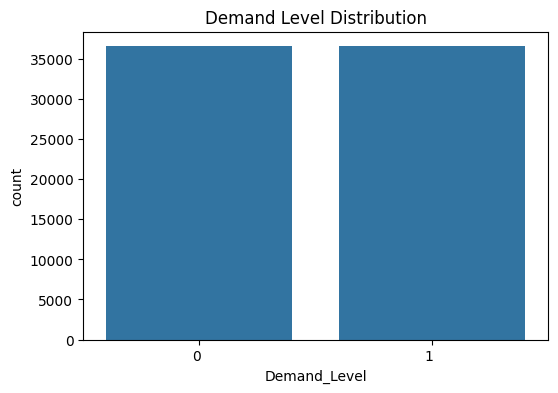

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Demand_Level', data=df)
plt.title("Demand Level Distribution")
plt.show()

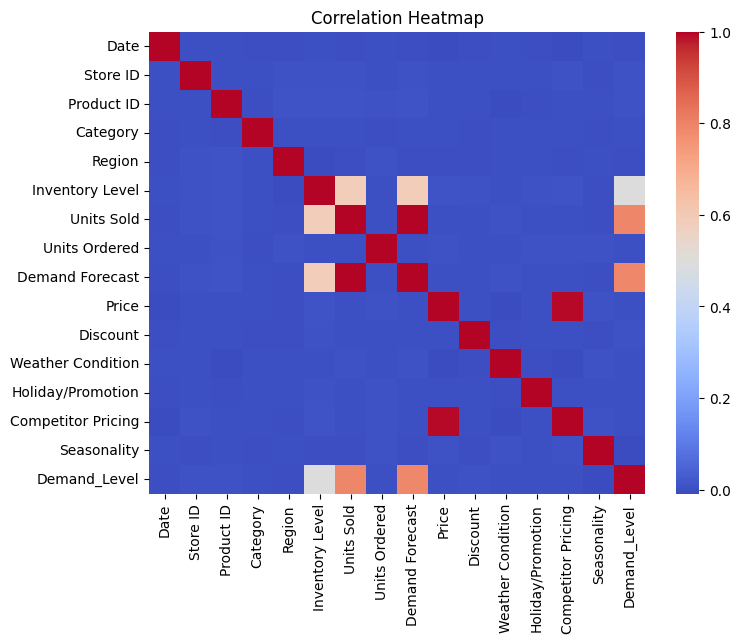

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('Demand_Level', axis=1)
y = df['Demand_Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.9960328317373461


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_acc)

Naive Bayes Accuracy: 0.9753077975376196


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 1.0


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 1.0


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.927359781121751


In [ ]:
model_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [lr_acc, nb_acc, dt_acc, rf_acc, knn_acc]
})

model_scores

,Model,Accuracy
0,Logistic Regression,0.996033
1,Naive Bayes,0.975308
2,Decision Tree,1.000000
3,Random Forest,1.000000
4,KNN,0.927360


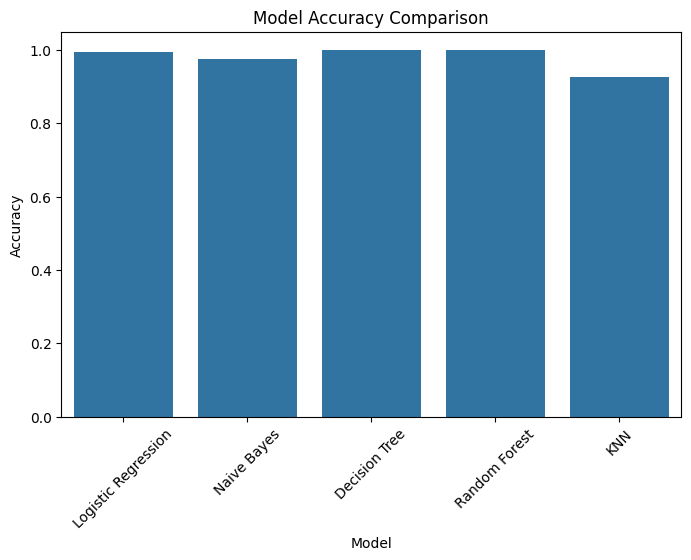

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=model_scores)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()